<a href="https://www.kaggle.com/sushakanaujia/disaster-tweets-using-logistic-regression?scriptVersionId=89192138" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tweets/sample_submission.csv
/kaggle/input/tweets/train.csv
/kaggle/input/tweets/test.csv


In [2]:
#Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import  Counter
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import math
import string
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
#Code:
# reading the csv file into pandas dataframes
df=pd.read_csv('/kaggle/input/tweets/train.csv')

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
#Code:
# reading the csv file into pandas dataframes
df_test=pd.read_csv('/kaggle/input/tweets/test.csv')

In [6]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Text Cleaning
This dataset requires a lot of cleaning. Have to remove Punctuations, Urls, Special Characters, stoping words etc.

In [7]:
def create_corpus(target):
    """
    This function is returning a list of words from the text which belongs to particular target value(0 or 1)
    """
    corpus=[]
    
    for doc in df[df['target']==target]['text'].str.split():
        for word in doc:
            word = word.lower()
            corpus.append(word)
    return corpus

In [8]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
stop=set(stopwords.words('english')) # storing stopwords of english
#Getting a corpus for non disaster text & creating a dictionary where key is word and its value is count of that word
corpus=create_corpus(0)
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] #Sorting keys according to values

Text(0.5, 1.0, 'Count Vs Stop Words')

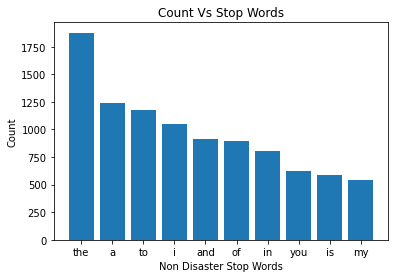

In [10]:
x,y=zip(*top)
plt.bar(x,y)
plt.xlabel('Non Disaster Stop Words')  
plt.ylabel('Count') 
plt.title("Count Vs Stop Words")

Most Common words

Text(0.5, 1.0, 'Words vs Count')

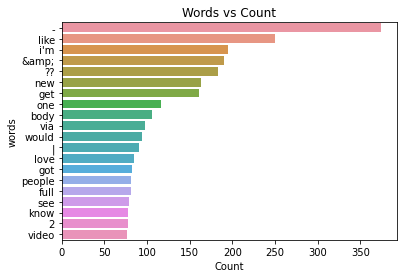

In [11]:
#Top 20 Common words for target = 0 (No disaster)
corpus=create_corpus(0)
start = 0
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:]:
    if start == 20:
        break
    if (word not in stop) :
        start += 1
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.xlabel('Count')  
plt.ylabel('words') 
plt.title("Words vs Count")

Text(0.5, 1.0, 'Words vs Count')

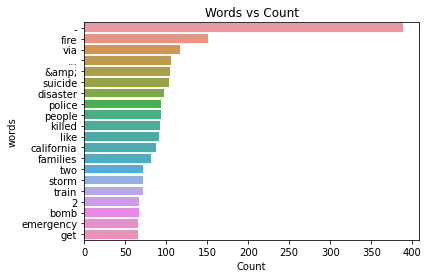

In [12]:
#Top 20 Common words for target = 1 (disaster)
corpus=create_corpus(1)
start = 0
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:]:
    if start == 20:
        break
    if (word not in stop) :
        start += 1
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)
plt.xlabel('Count')  
plt.ylabel('words') 
plt.title("Words vs Count")

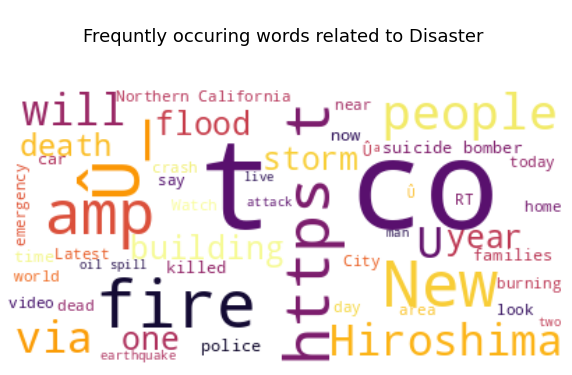

In [13]:
# word cloud for words related to Disaster 
text=" ".join(post for post in df[df['target']==1].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()


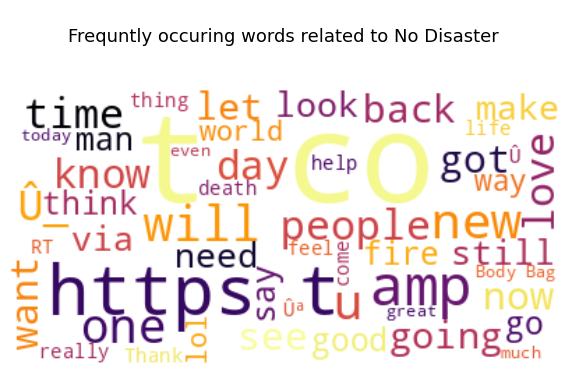

In [14]:
# word cloud for words related to No Disaster 
text=" ".join(post for post in df[df['target']==0].text)
wordcloud = WordCloud(max_font_size=90, max_words=50, background_color="white", colormap="inferno").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('\nFrequntly occuring words related to No Disaster \n\n',fontsize=18)
plt.axis("off")
plt.show()

Tokenizing

When we "tokenize" data, we take it and split it up into distinct chunks based on some pattern.

In [15]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

In [16]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\w+') 

In [17]:
#changing the contents of selftext to lowercase
df.loc[:,'text'] = df.text.apply(lambda x : str.lower(x))

In [18]:
#removing hyper link, latin characters and digits
df['text']=df['text'].str.replace('http.*.*', '',regex = True)
df['text']=df['text'].str.replace('û.*.*', '',regex = True)
df['text']=df['text'].str.replace(r'\d+','',regex= True)

In [19]:
# "Run" Tokenizer
df['tokens'] = df['text'].map(tokenizer.tokenize)

In [20]:
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,", people receive #wildfires evacuation orders ...",1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


Lemmatizing

When we "lemmatize" data, we take words and attempt to return their lemma, or the base/dictionary form of a word.

In [21]:
# Importing lemmatizer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Instantiating lemmatizer 
lemmatizer = WordNetLemmatizer()

In [22]:
lemmatize_words=[]
for i in range (len(df['tokens'])):
    word=''
    for j in range(len(df['tokens'][i])):
        lemm_word=lemmatizer.lemmatize(df['tokens'][i][j])#lemmatize
        
        word=word + ' '+lemm_word # joining tokens into sentence    
    lemmatize_words.append(word) # store in list
   

In [23]:
#creating a new column to store the result
df['lemmatized']=lemmatize_words

In [24]:
df.head()

,id,keyword,location,text,target,tokens,lemmatized
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,"[our, deeds, are, the, reason, of, this, earth...",our deed are the reason of this earthquake ma...
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, shelter, in, place...",all resident asked to shelter in place are be...
3,6,NaN,NaN,", people receive #wildfires evacuation orders ...",1,"[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order in c...
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala...",just got sent this photo from ruby alaska a s...


Modelling

In [25]:
#defining X and y for the model
X = df['lemmatized']
y = df['target']

In [26]:
# Spliting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [27]:
#ensuring that the value counts are quite evenly distributed
y_train.value_counts()

0    3256
1    2453
Name: target, dtype: int64

In [28]:
y_test.shape

(1904,)

Logistic Regression Model

In [29]:
# pipeline will consist of two stages:
# 1.Instantiating countVectorizer
# 2.Instantiating logistic regression model

pipe = Pipeline([
    ('cvec', CountVectorizer()),  
    ('lr', LogisticRegression()) 
])

In [30]:
tuned_params = {
    'cvec__max_features': [2500, 3000, 3500],
    'cvec__min_df': [2,3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=tuned_params, cv=3) # Evaluating model on unseen data

model_lr=gs.fit(X_train, y_train) # Fitting model

# This is the average of all cv folds for a single 
#combination of the parameters specified in the tuned_params
print(gs.best_score_) 

#displaying the best values of parameters
gs.best_params_

0.7792958486600104


{'cvec__max_df': 0.9,
 'cvec__max_features': 3500,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [31]:
# Test score
gs.score(X_train, y_train)

0.9120686635137503

In [32]:
# Test score
gs.score(X_test, y_test)

0.7862394957983193

In [33]:
# Generating predictions!
predictions_lr = model_lr.predict(X_test)

In [34]:
# Importing the confusion matrix function
from sklearn.metrics import confusion_matrix

In [35]:
#interpreting confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions_lr).ravel()

In [36]:
#values with coreesponding labels
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 921
False Positives: 165
False Negatives: 242
True Positives: 576
